In [15]:
import pandas as pd

def extract_close_column(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract the 'close' column
    close_column = df['trend']
    
    return close_column

In [16]:
def add_ema_and_difference(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Calculate the 9-day EMA of the 'close' column
    df['EMA 9'] = df['close'].ewm(span=9, adjust=False).mean()
    
    # Calculate the difference between the 'close' and 'EMA 9' columns
    df['trend'] = df['close'] - df['EMA 9']
    
    return df

In [17]:
# Example usage:
csv_file_path_AUDCAD = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\AUDCAD.csv'
dfAUDCAD = add_ema_and_difference(csv_file_path_AUDCAD)

csv_file_path_AUDJPY = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\AUDJPY.csv'
dfAUDJPY = add_ema_and_difference(csv_file_path_AUDJPY)

csv_file_path_AUDNZD = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\AUDNZD.csv'
dfAUDNZD = add_ema_and_difference(csv_file_path_AUDNZD)

csv_file_path_EURCAD = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\EURCAD.csv'
dfEURCAD = add_ema_and_difference(csv_file_path_EURCAD)

csv_file_path_EURCHF = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\EURCHF.csv'
dfEURCHF = add_ema_and_difference(csv_file_path_EURCHF)

csv_file_path_EURGBP = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\EURGBP.csv'
dfEURGBP = add_ema_and_difference(csv_file_path_EURGBP)

csv_file_path_EURUSD = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\EURUSD.csv'
dfEURUSD = add_ema_and_difference(csv_file_path_EURUSD)

csv_file_path_GBPUSD = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\GBPUSD.csv'
dfGBPUSD = add_ema_and_difference(csv_file_path_GBPUSD)

csv_file_path_USDCHF = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\USDCHF.csv'
dfUSDCHF = add_ema_and_difference(csv_file_path_USDCHF)

csv_file_path_USDJPY = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\FX data\USDJPY.csv'
dfUSDJPY = add_ema_and_difference(csv_file_path_USDJPY)

print(len(dfAUDCAD), len(dfAUDJPY), len(dfAUDNZD), len(dfEURCAD), len(dfEURCHF), len(dfEURGBP), len(dfEURUSD), len(dfGBPUSD), len(dfUSDCHF), len(dfUSDJPY))

7633 7650 7620 5929 7717 7715 11137 7733 11109 11164


In [18]:
print(dfAUDCAD.head())

         time    open    high     low   close  tick_volume  spread  \
0  1993-04-27  0.9109  0.9109  0.9109  0.9109            1     200   
1  1993-04-28  0.9068  0.9068  0.9068  0.9068            1     200   
2  1993-04-29  0.9040  0.9040  0.9040  0.9040            1     200   
3  1993-04-30  0.8990  0.8990  0.8990  0.8990            1     200   
4  1993-05-03  0.8955  0.8955  0.8955  0.8955            1     200   

   real_volume     EMA 9     trend  
0            0  0.910900  0.000000  
1            0  0.910080 -0.003280  
2            0  0.908864 -0.004864  
3            0  0.906891 -0.007891  
4            0  0.904613 -0.009113  


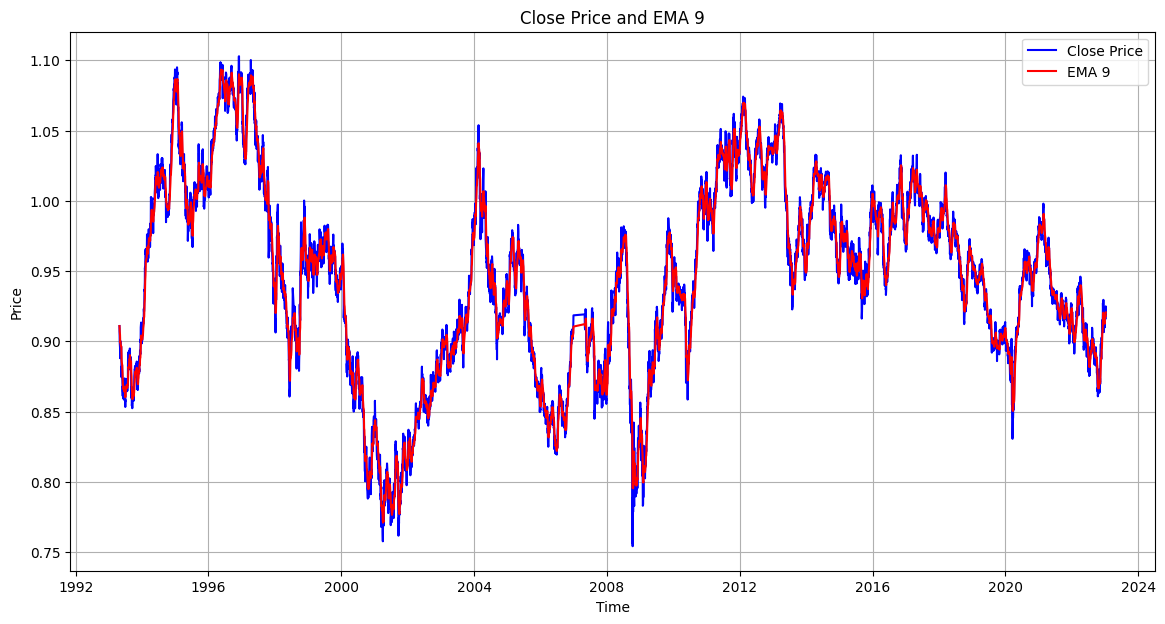

In [19]:
import matplotlib.pyplot as plt

def plot_close_and_ema(df):
    # Convert 'time' column to datetime format
    df['time'] = pd.to_datetime(df['time'])
    
    # Plot 'close' and 'EMA 9' columns
    plt.figure(figsize=(14,7))
    plt.plot(df['time'], df['close'], label='Close Price', color='blue')
    plt.plot(df['time'], df['EMA 9'], label='EMA 9', color='red')
    plt.title('Close Price and EMA 9')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_close_and_ema(dfAUDCAD)

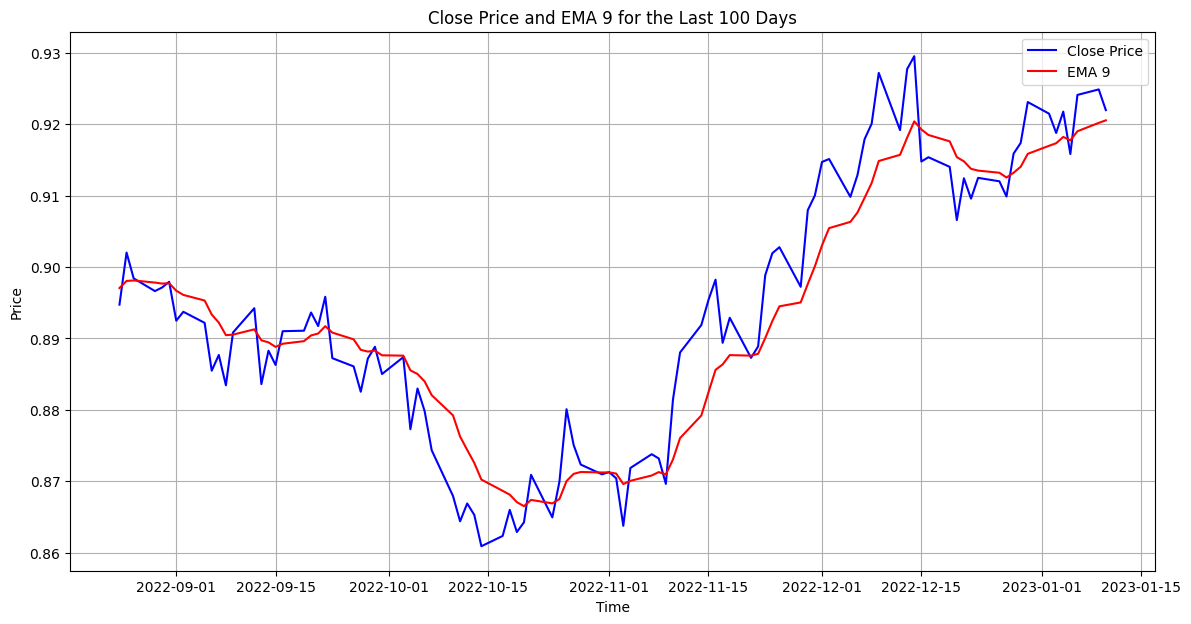

In [20]:
def plot_close_and_ema_last_100_days(df):
    # Convert 'time' column to datetime format
    df['time'] = pd.to_datetime(df['time'])
    
    # Select the last 100 rows
    df_last_100 = df.iloc[-100:]
    
    # Plot 'close' and 'EMA 9' columns
    plt.figure(figsize=(14,7))
    plt.plot(df_last_100['time'], df_last_100['close'], label='Close Price', color='blue')
    plt.plot(df_last_100['time'], df_last_100['EMA 9'], label='EMA 9', color='red')
    plt.title('Close Price and EMA 9 for the Last 100 Days')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_close_and_ema_last_100_days(dfAUDCAD)

In [21]:
def filter_and_merge_dataframes(dfs):
    # Filter each dataframe between the years 1993 and 2022
    dfs_filtered = []
    for df in dfs:
        df['time'] = pd.to_datetime(df['time'])
        df_filtered = df[(df['time'].dt.year >= 1993) & (df['time'].dt.year <= 2022)]
        dfs_filtered.append(df_filtered)
    
    # Merge all the dataframes on the 'time' column
    df_merged = dfs_filtered[0]
    for df in dfs_filtered[1:]:
        df_merged = pd.merge(df_merged, df, on='time', how='inner')
    
    return df_merged

# Example usage:
dataframes = [dfAUDCAD, dfAUDJPY, dfAUDNZD, dfEURCAD, dfEURCHF, dfEURGBP, dfEURUSD, dfGBPUSD, dfUSDCHF, dfUSDJPY]
df_merged = filter_and_merge_dataframes(dataframes)

print(df_merged)

           time   open_x   high_x    low_x  close_x  tick_volume_x  spread_x  \
0    1999-08-02  0.98100  0.98120  0.97710  0.97900             63       200   
1    1999-08-03  0.98060  0.98140  0.97620  0.97650             64       200   
2    1999-08-04  0.97850  0.98650  0.97710  0.98300            144       200   
3    1999-08-05  0.98250  0.98370  0.97700  0.97930            103       200   
4    1999-08-06  0.98240  0.98340  0.97760  0.98200            113       200   
...         ...      ...      ...      ...      ...            ...       ...   
5820 2022-12-26  0.91130  0.91413  0.91001  0.91201          50511        44   
5821 2022-12-27  0.91278  0.91724  0.90877  0.90988         388546        26   
5822 2022-12-28  0.90973  0.91903  0.90710  0.91588         401011        26   
5823 2022-12-29  0.91548  0.91922  0.91175  0.91738         415152        26   
5824 2022-12-30  0.91728  0.92387  0.91542  0.92311         438733        26   

      real_volume_x   EMA 9_x   trend_x

C:\Users\22941940\AppData\Local\Temp\ipykernel_24252\2515413880.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'trend_x', 'real_volume_x', 'EMA 9_x', 'spread_x', 'high_x', 'low_x', 'open_x', 'tick_volume_x', 'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = pd.merge(df_merged, df, on='time', how='inner')


In [12]:
def filter_and_merge_trends(dfs, names):
    # Filter each dataframe between the years 1993 and 2022 and select 'time' and 'trend' columns
    dfs_filtered = []
    for df, name in zip(dfs, names):
        df['time'] = pd.to_datetime(df['time'])
        df_filtered = df[(df['time'].dt.year >= 1993) & (df['time'].dt.year <= 2022)][['time', 'trend']].rename(columns={'trend': 'trend_' + name})
        dfs_filtered.append(df_filtered)
    
    # Merge all the dataframes on the 'time' column
    df_merged = dfs_filtered[0]
    for df in dfs_filtered[1:]:
        df_merged = pd.merge(df_merged, df, on='time', how='inner')
    
    return df_merged

# Example usage:
names = ['AUDCAD', 'AUDJPY', 'AUDNZD', 'EURCAD', 'EURCHF', 'EURGBP', 'EURUSD', 'GBPUSD', 'USDCHF', 'USDJPY']
dataframes = [dfAUDCAD, dfAUDJPY, dfAUDNZD, dfEURCAD, dfEURCHF, dfEURGBP, dfEURUSD, dfGBPUSD, dfUSDCHF, dfUSDJPY]
df_trends = filter_and_merge_trends(dataframes, names)

print(df_trends)

           time  trend_AUDCAD  trend_AUDJPY  trend_AUDNZD  trend_EURCAD  \
0    1999-08-02      0.001484     -1.058539     -0.003419      0.000000   
1    1999-08-03     -0.000813     -0.142832     -0.000895     -0.011360   
2    1999-08-04      0.004550     -0.202265     -0.008316      0.000112   
3    1999-08-05      0.000680     -0.417812      0.001587      0.002970   
4    1999-08-06      0.002704     -0.318250      0.000310      0.007496   
...         ...           ...           ...           ...           ...   
5820 2022-12-26     -0.001197     -0.706311      0.004476      0.000439   
5821 2022-12-27     -0.002662     -0.054649      0.007933     -0.003105   
5822 2022-12-28      0.002671      0.558681      0.002762      0.001436   
5823 2022-12-29      0.003336      0.063745      0.001482      0.001589   
5824 2022-12-30      0.007253     -0.545004      0.006066      0.006183   

      trend_EURCHF  trend_EURGBP  trend_EURUSD  trend_GBPUSD  trend_USDCHF  \
0        -0.003047   

In [22]:
def filter_dataframe(df, df_trends):
    # Convert 'time' column in df and df_trends to datetime
    df['time'] = pd.to_datetime(df['time'])
    df_trends['time'] = pd.to_datetime(df_trends['time'])

    # Filter df to only contain the entries in df_trends['time']
    df_filtered = df[df['time'].isin(df_trends['time'])]

    return df_filtered

In [27]:
import pandas as pd

# Read the file into a DataFrame
df = pd.read_csv('C:/Users/22941940/2024/Coding/Article/MTGNN/data/preprocessing/stocknet_wavelet_data_90.txt', sep=",")

# Get the number of columns
num_columns = df.shape[1]

print(f"The file has {num_columns} columns.")

The file has 81 columns.


In [23]:
dataframes_filtered = [filter_dataframe(df, df_trends) for df in dataframes]

In [24]:
dataframes_filtered

[           time     open     high      low    close  tick_volume  spread  \
 1619 1999-08-02  0.98100  0.98120  0.97710  0.97900           63     200   
 1620 1999-08-03  0.98060  0.98140  0.97620  0.97650           64     200   
 1621 1999-08-04  0.97850  0.98650  0.97710  0.98300          144     200   
 1622 1999-08-05  0.98250  0.98370  0.97700  0.97930          103     200   
 1623 1999-08-06  0.98240  0.98340  0.97760  0.98200          113     200   
 ...         ...      ...      ...      ...      ...          ...     ...   
 7621 2022-12-26  0.91130  0.91413  0.91001  0.91201        50511      44   
 7622 2022-12-27  0.91278  0.91724  0.90877  0.90988       388546      26   
 7623 2022-12-28  0.90973  0.91903  0.90710  0.91588       401011      26   
 7624 2022-12-29  0.91548  0.91922  0.91175  0.91738       415152      26   
 7625 2022-12-30  0.91728  0.92387  0.91542  0.92311       438733      26   
 
       real_volume     EMA 9     trend  
 1619            0  0.977516  0.0

In [25]:
# Define the list of pair names
pair_names = ['AUDCAD', 'AUDJPY', 'AUDNZD', 'EURCAD', 'EURCHF', 'EURGBP', 'EURUSD', 'GBPUSD', 'USDCHF', 'USDJPY']

# Save each DataFrame as a separate CSV file
for df, pair_name in zip(dataframes_filtered, pair_names):
    df.to_csv(f'{pair_name}_filtered.csv', index=False)

In [13]:
# Drop the 'time' column
df_trends_no_time = df_trends.drop(columns='time')

# Save to .txt file without headers
df_trends_no_time.to_csv('ema9.txt', header=False, index=False, sep=',')